# Image Transformations

# Image Translation

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
img1=cv2.imread('image1.jpg')
img2=cv2.imread('image2.jpg')

rgb1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
rgb2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [3]:
print(rgb1.shape)
print(rgb2.shape)
h,w,c = rgb1.shape
p=rgb2[3,3]

(417, 626, 3)
(720, 1280, 3)


In [4]:
p=rgb2[3,3]
n=np.array([[1,1],[1,2]])
m=np.array([1,1])
h,w = n.shape
for i in range(0,h):
        for j in range(0,w):
            n[j,i]+(j+2)+(i+1)
n

array([[1, 1],
       [1, 2]])

In [5]:
def tra(img,r,co):
    h,w,c = img.shape
    mattr=np.array([[1,0,r],[0,1,co],[0,0,1]])
    translated_img = np.ones_like(img)
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img
    

In [6]:
tr=tra(rgb1,200,-200)
tr1=tra(rgb1,0,200)
tr2=tra(rgb1,-200,200)
tr3=tra(rgb1,200,0)

Text(0.5, 1.0, 'Side')

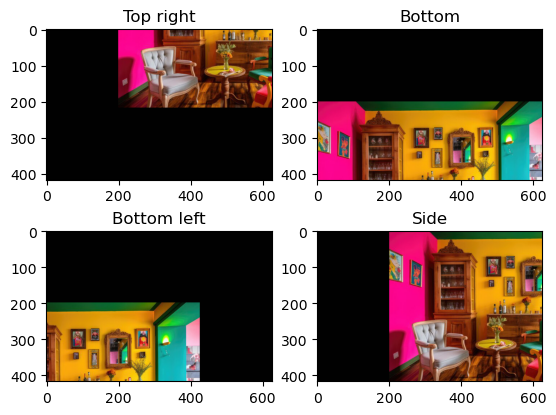

In [7]:
plt.subplot(2,2,1)
plt.imshow(tr)
plt.title("Top right")

plt.subplot(2,2,2)
plt.imshow(tr1)
plt.title("Bottom")

plt.subplot(2,2,3)
plt.imshow(tr2)
plt.title("Bottom left")

plt.subplot(2,2,4)
plt.imshow(tr3)
plt.title("Side")

In [8]:
def sca(img,r,co):
    h,w,c = img.shape
    mattr=np.array([[r,0,0],[0,co,0],[0,0,1]])
    translated_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [9]:
ro=sca(rgb1,0.75,0.75)
ro2=sca(rgb1,0.5,1)
ro3=sca(rgb1,1,0.5)

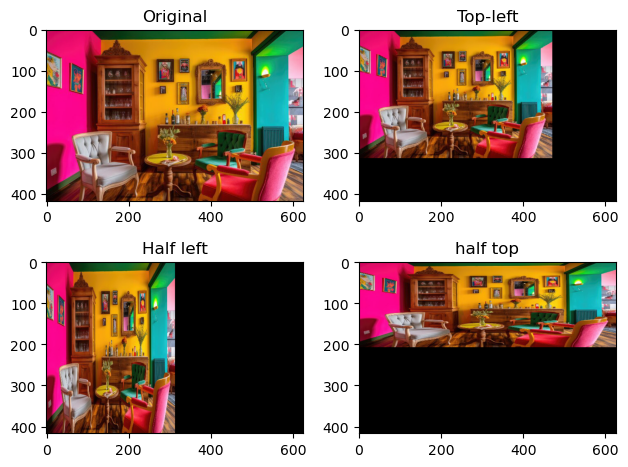

In [10]:
plt.subplot(2,2,1)
plt.imshow(rgb1)
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(ro)
plt.title("Top-left")

plt.subplot(2,2,3)
plt.imshow(ro2)
plt.title('Half left')

plt.subplot(2,2,4)
plt.imshow(ro3)
plt.title('half top')

plt.tight_layout()
plt.show()

In [11]:
def ref(img,co):
    h,w,c = img.shape
    translated_img = np.zeros_like(img)
    if co==0:
         mattr=np.array([[1,0,0],[0,-1,h],[0,0,1]])
    else:
         mattr=np.array([[-1,0,w],[0,1,0],[0,0,1]])
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [12]:
re=ref(rgb1,1)
re2=ref(rgb1,0)
re3=ref(re,0)

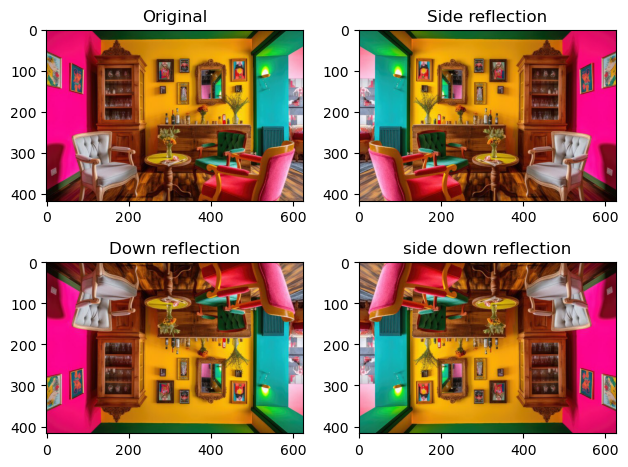

In [13]:
plt.subplot(2,2,1)
plt.imshow(rgb1)
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(re)
plt.title("Side reflection")

plt.subplot(2,2,3)
plt.imshow(re2)
plt.title('Down reflection')

plt.subplot(2,2,4)
plt.imshow(re3)
plt.title('side down reflection')

plt.tight_layout()
plt.show()

In [14]:
def rot(img,co):
    h,w,c = img.shape
    center_x,center_y=w//2,h//2
    angle_rad = math.radians(co)
    mattr_t = np.array([[np.cos(angle_rad), -np.sin(angle_rad), center_x - center_x * np.cos(angle_rad) + center_y * np.sin(angle_rad)],
                      [np.sin(angle_rad), np.cos(angle_rad), center_y - center_x * np.sin(angle_rad) - center_y * np.cos(angle_rad)],
                      [0, 0, 1]])
    mattr_r=np.array([[1,0,0],[0,1,0],[0,0,1]])
    mattr=mattr_t@mattr_r
    translated_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [15]:
rom180=rot(rgb1,180)
rom45=rot(rgb1,45)
rom90=rot(rgb1,90)
rom135=rot(rgb1,135)

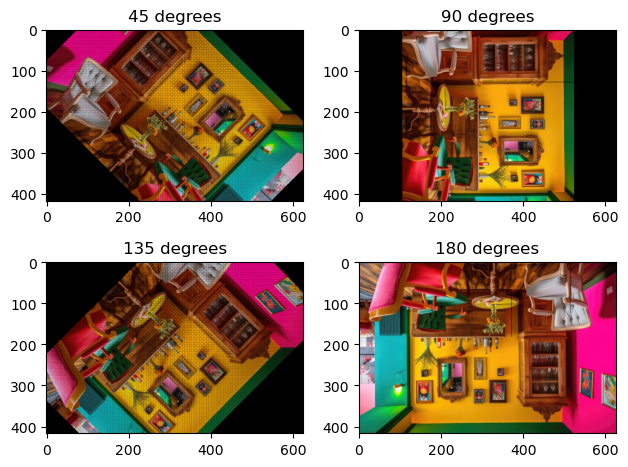

In [16]:
plt.subplot(2,2,1)
plt.imshow(rom45)
plt.title("45 degrees")

plt.subplot(2,2,2)
plt.imshow(rom90)
plt.title("90 degrees")

plt.subplot(2,2,3)
plt.imshow(rom135)
plt.title('135 degrees')

plt.subplot(2,2,4)
plt.imshow(rom180)
plt.title('180 degrees')

plt.tight_layout()
plt.show()

In [120]:
def she(img,u,k):
    h,w,c = img.shape
    translated_img = np.zeros_like(img)
    mattr=np.array([[1,u,0],[k,1,0],[0,0,1]])
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [132]:
sh1=she(rgb1,0,-0.5)
sh2=she(rgb1,0.5,0)
sh3=she(rgb1,-0.5,0)
sh4=she(rgb1,0,0.5)

Text(0.5, 1.0, 'Top-down')

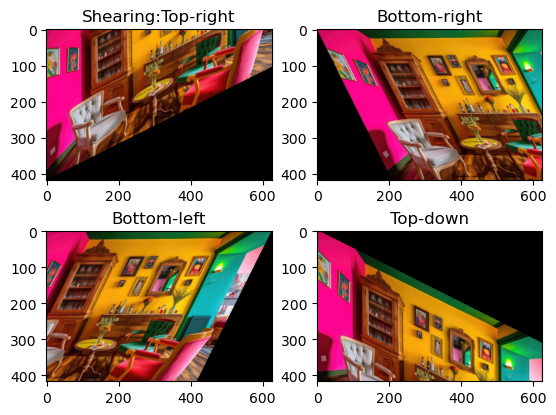

In [139]:
plt.subplot(2,2,1)
plt.imshow(sh1)
plt.title("Shearing:Top-right")

plt.subplot(2,2,2)
plt.imshow(sh2)
plt.title("Bottom-right")

plt.subplot(2,2,3)
plt.imshow(sh3)
plt.title('Bottom-left')

plt.subplot(2,2,4)
plt.imshow(sh4)
plt.title('Top-down')

In [179]:
def tran(img,rowtr,colutr,deg,rowsc,colusc,brl,rsh,csh):
    h,w,c = img.shape
    center_x,center_y=w//2,h//2
    angle_rad = math.radians(deg)
    mat_r = np.array([[np.cos(angle_rad), -np.sin(angle_rad), center_x - center_x * np.cos(angle_rad) + center_y * np.sin(angle_rad)],
                      [np.sin(angle_rad), np.cos(angle_rad), center_y - center_x * np.sin(angle_rad) - center_y * np.cos(angle_rad)],
                      [0, 0, 1]])
    mat_tr=np.array([[1,0,rowtr],[0,1,colutr],[0,0,1]])
    mat_sc=np.array([[rowsc,0,0],[0,colusc,0],[0,0,1]])
    if brl==0:
         mat_rl=np.array([[1,0,0],[0,-1,h],[0,0,1]])
    elif brl==1:
         mat_rl=np.array([[-1,0,w],[0,1,0],[0,0,1]])
    else:
        print('Wrong code for Reflection')
    mat_sh=np.array([[1,rsh,0],[csh,1,0],[0,0,1]])
    m_final=mat_tr@mat_r@mat_sc@mat_rl@mat_sh
    translated_img = np.ones_like(img)
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(m_final,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [180]:
fi=tran(rgb1,100,100,66,0.7,0.9,0,-0.5,0)

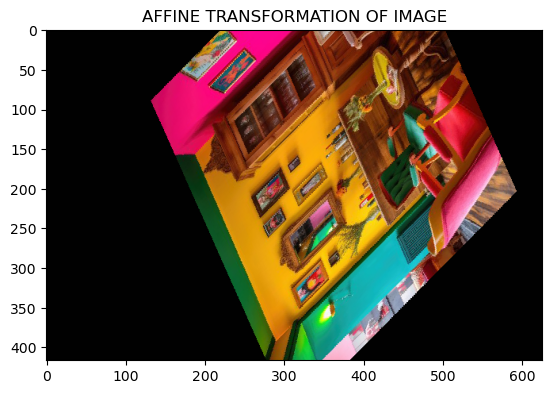

In [182]:
plt.title('AFFINE TRANSFORMATION OF IMAGE')
plt.imshow(fi)

In [17]:
def rot2(img,co):
    h,w,c = img.shape
    center_x,center_y=w//2,h//2
    angle_rad = math.radians(co)
    mattr = np.array([[np.cos(angle_rad), -np.sin(angle_rad), center_x - center_x * np.cos(angle_rad) + center_y * np.sin(angle_rad)],
                      [np.sin(angle_rad), np.cos(angle_rad), center_y - center_x * np.sin(angle_rad) - center_y * np.cos(angle_rad)],
                      [0, 0, 1]])
    translated_img = np.zeros_like(img*2)
    for i in range(h):
        for j in range(w):
            mat=np.array([j,i,1])
            mul=np.dot(mattr,mat)
            new_x, new_y = int(mul[0]), int(mul[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                translated_img[new_y, new_x] = img[i, j]
    return translated_img

In [20]:
rom180=rot2(rgb1,90)

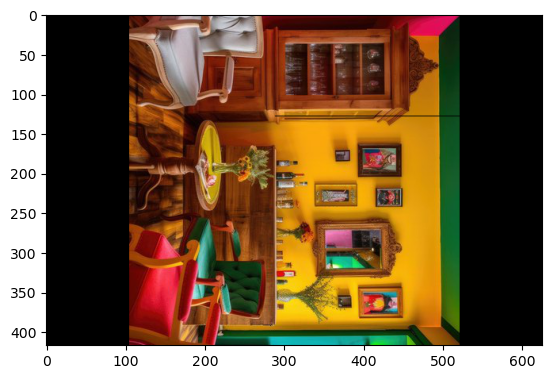

In [21]:
plt.imshow(rom180)